## Homework Artificial Intelligence

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Python

In [2]:
def sumMatrixWhile(A):
    # Using a while loop, return the sum of all element of matrix A
    s = 0
    i = 0
    while i < len(A):
        j = 0
        while j < len(A) :
            s = s+A[i][j]
            j = j+1
        i = i+1
    
    return s

In [3]:
A=np.array([[1,2,3],[3,4,5]])
sumMatrixWhile(A)

np.int64(10)

In [4]:
# This function returns True if the number n is odd 
# and False otherwise (n is even)
def is_odd(n):
    rest = n    
    while True:
        rest = rest   -   2
        if rest == 0:
            return False
        if rest == 1:
            return True
    

In [5]:
# Using a given vector v, return a matrix C with vector v 
# in the second column and 1 in the first column
# DO NOT USE np.c_[]
def columnOnesMatrix(v): # v is a vector
    #complete the line below
    C = np.zeros((len(v),2))
    i = 0
    while i<len(v) :
        C[i, 0]  = 1
        C[i, 1] = v[i]   
        i =i+1 
    
    return C

In [9]:
# Using a given vector v, return a matrix with vector v 
# in the first column and ones(1) in the second column
def columnOnesMatrix2(v): # v is a vector
    #complete the line below
    # initialize c, c is the resulting matrix
    c = np.zeros((len(v), 2))
    for i in range(len(v)):          
        for j in range(2):            
            if j == 0:
                c[i, j] = 1
            else:                     
                c[i, j] = v[i]
    
    return c

## Perceptron

In [10]:
#load and plot the data
data = np.loadtxt('./data/ex2data1.txt',delimiter=',')
data[0:5]

array([[34.62365962, 78.02469282,  0.        ],
       [30.28671077, 43.89499752,  0.        ],
       [35.84740877, 72.90219803,  0.        ],
       [60.18259939, 86.3085521 ,  1.        ],
       [79.03273605, 75.34437644,  1.        ]])

In [11]:
# seperate them into X and y
X = np.c_[data[:,:-1]]
y = np.c_[data[:,-1]]

In [12]:
X[0:5]

array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644]])

In [13]:
y[0:5]

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.]])

In [22]:
# This function returns 1 if z>=0 and 0 otherwise
def unitStepFunction(z): 
    return np.where(z>=0,1,0)


In [25]:
def train(X, y, learning_rate, iterations):
    # number of examples
    n_examples = y.size
    # number of inputs
    n_inputs = X.shape[1]
    # initialize the parameters
    weights = np.zeros(n_inputs)
    bias = 0

    for  _  in range( iterations  ):
        for index, xi in enumerate( X ):
            linear_output =  xi.dot(weights)+bias
            y_predicted =  unitStepFunction(linear_output)

            update_value = learning_rate*(y[index]-y_predicted)
            weights =weights+update_value
            bias = bias+update_value


    return weights,bias
    

In [26]:
weights,bias = train( X, y, 0.01, iterations=5000 )
weights,bias

(array([0., 0.]), array([0.]))

In [29]:
def predict(X,weight,bias):
    linear_output=X.dot(weight) + bias
    return unitStepFunction(linear_output)

In [30]:
# Do a scatter plot of the data: using ex2data1.txt
preds = predict(X, weights, bias)
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

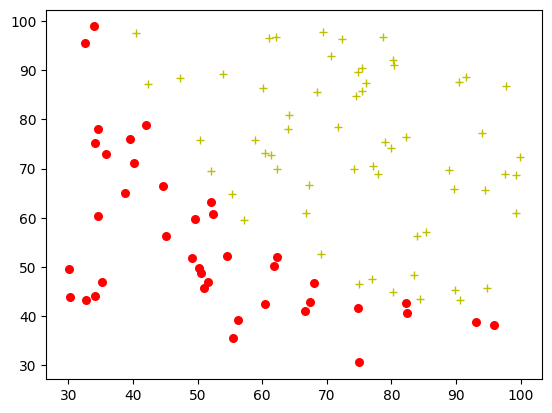

In [32]:
# display the predicted line on the scatter plot
ind0=np.nonzero(y==0)[0]
ind1=np.nonzero(y==1)[0]

plt.scatter(X[ind0, 0], X[ind0, 1], s=30, c='r', marker='o',
            linewidths=1, label='Not admitted')

plt.scatter(X[ind1, 0], X[ind1, 1], s=30, c='y', marker='+',
            linewidths=1, label='Admitted')

## Logistic Regression

In [49]:
def sigmoid(z):
    return 1/(1+ np.exp(-z))

In [50]:
def initialWeights( X ):
    w = np.zeros((X.shape[1],1))
    b = 0
    return w, b

In [51]:
params = initialWeights( X )

In [52]:
def forwardPropagation(X,params):
    w=params[0]
    b=params[1]
    z = np.dot(X,w)+b
    y_predict =sigmoid(z) 

    epsilon = 1e-15  # Small value to prevent log(0)
    # Clip predictions to avoid 0 and 1
    y_predict = np.clip(y_predict, epsilon, 1 - epsilon)
    
    
    return y_predict

In [53]:
y_predict = forwardPropagation(X,params )

In [54]:
def computeCost( y,y_predict ):
    m = y.size
    cost = -(1/m)*np.sum(y*np.log(y_predict) + (1-y)*np.log(1-y_predict))
    return cost

In [55]:
computeCost( y,y_predict )

np.float64(0.6931471805599453)

In [56]:
def backPropagation(X, y, y_predict):
    m = y.size
    dw = (1/m)*(y_predict-y).T.dot(X).T
    db = (1/m)*np.sum(y_predict-y)
    return  dw,db 

In [57]:
grads = backPropagation(X, y, y_predict )

In [58]:
def updateWeights(params,grads,learning_rate ):
    
    w=params[0]
    b=params[1]
    
    dWeights =grads[0]
    dBias =grads[1]
    
    weights = w- learning_rate*dWeights
    bias = w-learning_rate*dBias
    
    return weights,bias

In [62]:
weights,bias= updateWeights( params,grads,0.01 )

In [63]:
def trainLog(X, y, epochs = 200000, learning_rate = 0.01):
    
    params = initialWeights( X )
    cost_history =[]
    for _ in range( epochs ):
        y_predict =forwardPropagation(X, w, b)
        cost = computeCost( y,y_predict )
        grads = backPropagation(X, y, y_predict )
        params =updateWeights
        cost_history.append(cost )

        
        
    weights, bias = params
    return  weights, bias



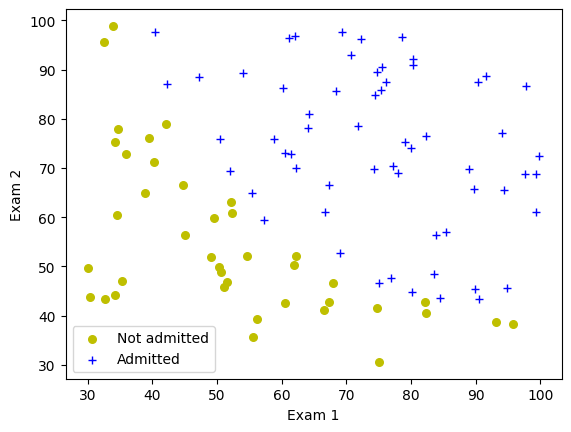

In [64]:
# Do a scatter plot  of the data
ind0=np.nonzero(y==0)[0]
ind1=np.nonzero(y==1)[0]
plt.scatter(X[ind0,0],X[ind0,1], s=30, c='y', marker='o', linewidths=1, label='Not admitted')
plt.scatter(X[ind1,0],X[ind1,1], s=30, c='b', marker='+', linewidths=1, label='Admitted')
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')
plt.legend()

In [65]:
# display the predicted line on the scatter plot
pos = (y == 1).ravel()
neg = (y == 0).ravel()
x_plot = np.array((X[:, 1].min(), X[:, 1].max()))
y_plot = -(1/w[1, 0]) * (b + w[0, 0] * x_plot)

plt.plot(X[pos, 0], X[pos, 1], 'k+', X[neg, 0], X[neg, 1], 'yo')
plt.plot(x_plot, y_plot)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc='upper center', labels=['Admitted', 'Not admitted', 'Decision boundary'], bbox_to_anchor=(0.5,-0.15));


NameError: name 'w' is not defined

## Multi Layers ANN

In [ ]:
def initParamsANN(X, y, hidden_units):
    X = ..
    y = ..
    # number of inputs
    n = ?
    # number of outputs
    n_y = ?
    
    w1 = ..
    b1 = ..
    w2 = ..
    b2 = ..
    
    return ..

In [ ]:
p = initParamsANN(                  ..                        )

In [ ]:
def forwardPropagationANN(           ..               ):
    w1 = ?
    b1 = ?
    w2 = ?
    b2 = ?
    
    Z1 = ?
    A1 = ?
    Z2 = ?
    A2 = ?

    epsilon = 1e-15  # Small value to prevent log(0)
    # Clip predictions to avoid 0 and 1
    A2 = np.clip(A2, epsilon, 1 - epsilon)

    return ..
    

In [ ]:
c = forwardPropagationANN(               ..                       )

In [ ]:
def computeCostANN(                     ..                       ):
    return ..

In [ ]:
computeCostANN(                 ..                      )

In [ ]:
def backPropagationANN(                     ..                          ):

    m = ?
    
    w1 = ?
    b1 = ?
    w2 = ?
    b2 = ?
    
    Z1 = ?
    A1 = ?
    Z2 = ?
    A2 = ?

    dZ2 = ?
    dw2 = ?
    db2 = ?
    dZ1 = ?
    dw1 = ?
    db1 = ?

    return ..

In [ ]:
g = backPropagationANN(                  ..                           )

In [ ]:
def updateParamsANN(                            ..                                   ):

    w1 = ?
    b1 = ?
    w2 = ?
    b2 = ?
    
    dw1 =?
    db1 =?
    dw2 =?
    db2 =?

    w1 = ?
    b1 = ?
    w2 = ?
    b2 = ?

    return ..
    

In [ ]:
p = updateParamsANN(                       ..                                )

In [ ]:
def trainANN(                                  ..                                                    ):
    
    p = ?
    cost_history = ?
    

    for _ in range(                                 ):
        c = ..
        A2 = ..
        cost = ..
        g = ..
        p = ..
        cost_history.append(               ..                    )

        
            
   

    w1 = ..
    b1 = ..
    w2 = ..
    b2 = ..
    
    return ..

In [ ]:
             ..            = trainANN(                       ..                         )

In [ ]:
# using the "cancer.csv" file, do a scatter plot
?

In [ ]:
# Display the decision boudary on the scatter plot
?

In [ ]:
# do the scatter plot using : using ex2data1.txt
?

In [ ]:
# display the decision boundary on the scatter plot of ex2data1.txt
?